## List all the rails and their indexes before beginning

In [4]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import matplotlib.pyplot as plt

# Initialise TraceProcessor with a trace file
# tp = TraceProcessor(trace='trace_iperf.perfetto-trace')
# tp = TraceProcessor(trace='trace_5M_band66.perfetto-trace')
phone_str = "Pixel8"
trace_name = "pixel8_standby_0";
tp = TraceProcessor(trace="../Traces/"+phone_str+"/"+trace_name+".perfetto-trace") 

# print(tp)
qr_it = tp.query('SELECT * FROM counter_track')
# print(qr_it)
qr_it_pandas = qr_it.as_pandas_dataframe()
print(qr_it_pandas)

# qr_it_pd2 = qr_it_pandas.filter(regex='power.rails.display')
# print(qr_it_pandas[qr_it_pandas['name']=='power.rails.display'])
# for row in qr_it:
#   print(row.id, row.type, row.name)


    id           type                          name parent_id  \
0    1  counter_track         power.S1S_VDD_CAM_uws         0   
1    2  counter_track               power.rails.gpu         0   
2    3  counter_track             power.rails.ddr.c         0   
3    4  counter_track             power.rails.ddr.a         0   
4    5  counter_track      power.S8S_VDD_G3D_L2_uws         0   
5    6  counter_track         power.rails.aoc.logic         0   
6    7  counter_track    power.L2S_PLL_MIPI_UFS_uws         0   
7    8  counter_track               power.rails.gps         0   
8    9  counter_track      power.L21S_VDD2L_MEM_uws         0   
9   10  counter_track           power.rails.display         0   
10  11  counter_track           power.rails.wifi.bt         0   
11  12  counter_track        power.S12S_VDD_AUR_uws         0   
12  13  counter_track  power.rails.memory.interface         0   
13  14  counter_track           power.rails.cpu.big         0   
14  15  counter_track    

## Create a id map for important power rails to be used in 01 notebok

Text(0.5, 0.98, 'Raw Values, can be tallied if needed with Perfetto UI')

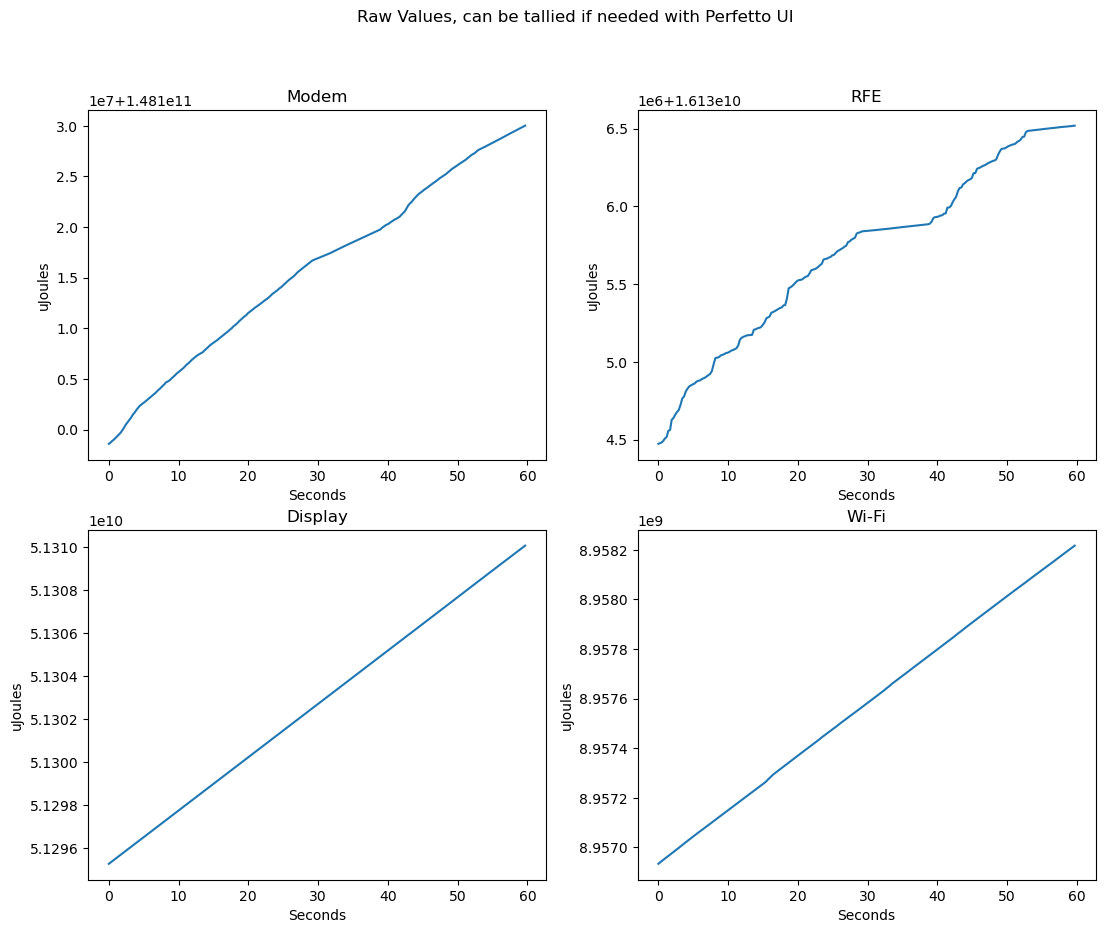

In [11]:
id_mapper = [23,24,10,22]
string_mapper = ["Modem","RFE","Display","Wi-Fi"]

df_list_cleaned = [tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in id_mapper]
# import pdb;pdb.set_trace()
df_np = np.array(df_list_cleaned)
df_np[:,:,0] = df_np[:,:,0] - np.tile(df_np[:,0,0],[df_np.shape[1],1]).T 
df_np[:,:,0] = df_np[:,:,0]/1e9
# import pdb; pdb.set_trace()
plt.rcParams['figure.figsize'] = [13, 10]
for i in range(1,len(id_mapper)+1):
    plt.subplot(2,2,i)
    x_vals = df_np[i-1,:,0]
    y_vals = df_np[i-1,:,1] 
    plt.plot(x_vals,y_vals)
    plt.xlabel("Seconds")
    plt.ylabel("uJoules")
    plt.title(string_mapper[i-1])
plt.suptitle("Raw Values, can be tallied if needed with Perfetto UI")